# What is the Minkowski distance?

In this script, we investigate some properties of the Minkowski metric that is used to compute the distance between two points 
in multidimensional space. 

The Minkowski metric defines the distance between the two points $\bf{x}$ and  $\bf{y}$ as 
<blockquote>  
$D_{p}(\bf{x}, \bf{y}) = (\sum\limits_{i=1}^D |x_{i}-y_{i}|^p)^{1/p}$
</blockquote> 
where $D$ is the dimension and the integer parameter $\it{p}$ is a free parameter. Some well-known metrics can be derived from it:

<blockquote> 
Manhattan distance ($p=1$)
<blockquote>  
$D_{1}(\bf{x}, \bf{y}) = \sum\limits_{i=1}^D |x_{i}-y_{i}|$
</blockquote>

Euclidean distance ($p=2$)
<blockquote>  
$D_{2}(\bf{x}, \bf{y}) = \sqrt{\sum\limits_{i=1}^D |x_{i}-y_{i}|^2}$
</blockquote> 

Maximum distance ($p=\infty$)
<blockquote>  
$D_{\inf}(\bf{x}, \bf{y}) = \max_{i=1}^D |x_{i}-y_{i}| $
</blockquote>                                 
</blockquote> 

We will compute the Minkowski metrics for values of $p=[1, 2, 4, 100]$. The value of 100 avoids
numerical instabilities and is large enough to give an idea of what happens when $p=\infty$.

Moreover, we will compute the distance between the origin $\bf{x}= (0,0,0)$ and the points inside a square 
pillbox of dimensions 2x2x1. Then, we will locate the points $\bf{y}$ on the 3-D surface $D_{p}(\bf{x}, \bf{y})=1$.

In what follows, we use the following convention to avoid any confusion. Both vectors $\bf{x}$ and $\bf{y}$ are 
set in 3D space with coordinates  $(x_{1}, x_{2}, x_{3})$. Hence $\bf{x}= (0,0,0)$  and $\bf{y}= (x_{1}, x_{2}, x_{3})$ .


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors, cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.distance import cdist
from skimage.measure import marching_cubes_lewiner

import math

import seaborn as sns
sns.set(color_codes=True)

Automatically created module for IPython interactive environment


### Generate a spatial grid where the distance to the origin will be evaluated locally.

In [2]:
# Number of spatial bins used in each spatial direction
nbins = 100
nbins2 = int(nbins/2)

x_min = -1.1
x_max = 1.1
y_min = -1.1
y_max = 1.1
z_min = 0
z_max = 1.1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, nbins), np.linspace(y_min, y_max, nbins), 
                         np.linspace(z_min, z_max, nbins2))
Xgrid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]


### Compute the local distance to the origin using four different values of Minkowski parameter $p$.

In [3]:
# Position of the origin
Xc =  np.zeros((1, 3), dtype=float)

# Minkowski parameters p
minkowsi_parameters = np.array([1, 2, 4, 100])

# Compute the distance from each grid position to the origin
npts = Xgrid.shape[0]
dist = np.zeros((nbins, nbins, nbins2, 4), dtype=float)

for i, p in enumerate(minkowsi_parameters):
    dist[:,:,:,i] = cdist(Xc, Xgrid, metric='minkowski', p=p).reshape((nbins, nbins, nbins2))


### For each Minkowski parameter, display the 3-D positions where the distance to the origin is unity.

The $(x_{1}, x_{2}, x_{3})$ positions are located on surfaces $D_{p}(\bf{x}, \bf{y})=1$.

The first panel in the figure below shows the Manhattan distance with its pyramidal shape. 
This shape emerges from the condition $x_{1} + x_{2} + x_{3}=1$.

The second panel shows the familiar euclidean distance where the condition $D_{2}(\bf{x}, \bf{y})=1$ is equivalent to
the condition $x_{1}^2 + x_{2}^2 + x_{3}^2=1$ which is a 3-D sphere of unit radius.

Larger values of the parameter $p$ produce boxy-looking surfaces. The last panel 
shows the pillbox previously mentionned. This corresponds to the largest distance 
<blockquote> 
$D_{\inf}(\bf{x}, \bf{y}) = \max{|x_{1}|, |x_{2}|, |x_{3}|}$
</blockquote> 
in each direction/dimension, i.e. the sides of the box.

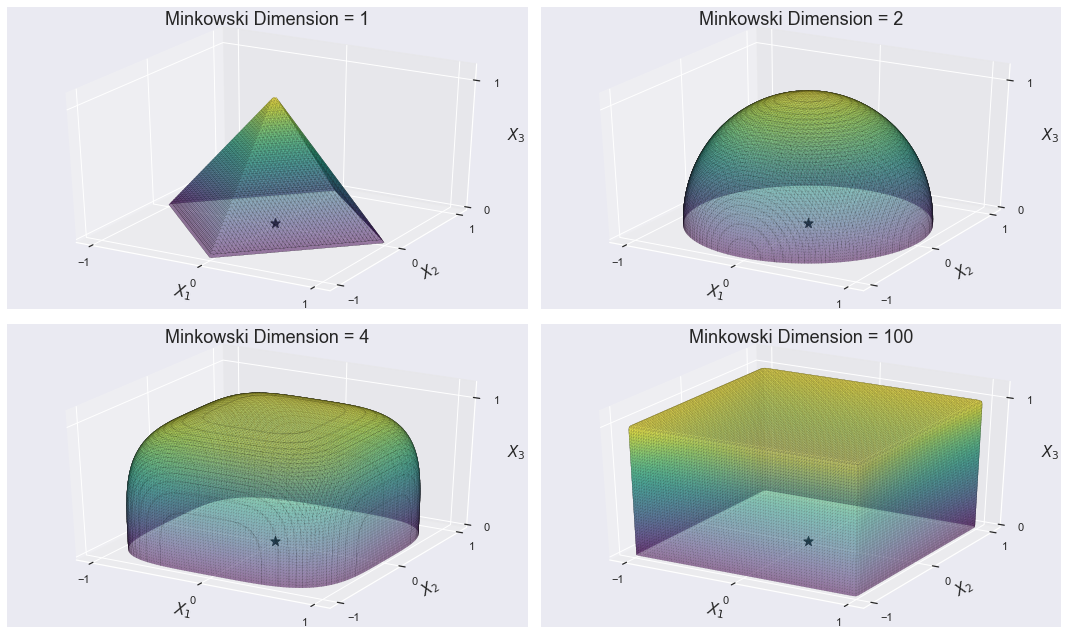

In [4]:
# Grid spacings
dx = ( x_max -  x_min)/( nbins-1)
dy = ( y_max -  y_min)/( nbins-1)
dz = ( z_max -  z_min)/( nbins2-1)

my_cmap = plt.get_cmap('viridis') 
fig, axs = plt.subplots(2, 2, figsize = (15,9), subplot_kw={'projection': '3d'}) 
fig.canvas.set_window_title('3D')

for k in range(4):
    ax = axs.ravel()[k]
    
    # Pinpoint the origin using a starry marker 
    ax.scatter3D(0., 0., 0., c='k', marker='*', s=100);

    # Use the marching-cube algorithm to locate the voxels (x,y,z) where distance=1.
    distance = np.squeeze(dist[:,:,:,k])
    distance = np.transpose(distance, (1, 0, 2))
    verts, faces, _, _ = marching_cubes_lewiner(distance, 1.0, spacing=( dy,  dx,  dz))
    ax.plot_trisurf(verts[:, 0]+y_min, verts[:,1]+x_min, faces, verts[:, 2]+z_min, alpha=0.5, 
                    edgecolor='k', linewidth=0.1, antialiased=True, zorder=1, cmap=my_cmap)

    ax.set_xlim3d( x_min,  x_max)
    ax.set_ylim3d( y_min,  y_max)
    ax.set_zlim3d( z_min,  z_max)
    ax.set_xlabel('$X_{1}$', rotation=0, fontsize=15)
    ax.set_ylabel('$X_{2}$', fontsize=15)

    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel('$X_{3}$', rotation=0, fontsize=15)

    ax.set_xticks(np.array([-1., 0., 1]))
    ax.set_yticks(np.array([-1., 0., 1]))
    ax.set_zticks(np.array([0., 1]))
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.1)      
    ax.set_title('Minkowski Dimension = %d' % (minkowsi_parameters[k]), fontsize=18)

fig.tight_layout()
plt.savefig('Minkowski distance_1.png')
plt.savefig('Minkowski distance_1.pdf')

### Superpose the four surfaces
The next figure shows nicely the evolution of the surface shapes as the Minkowski parameter is varied.

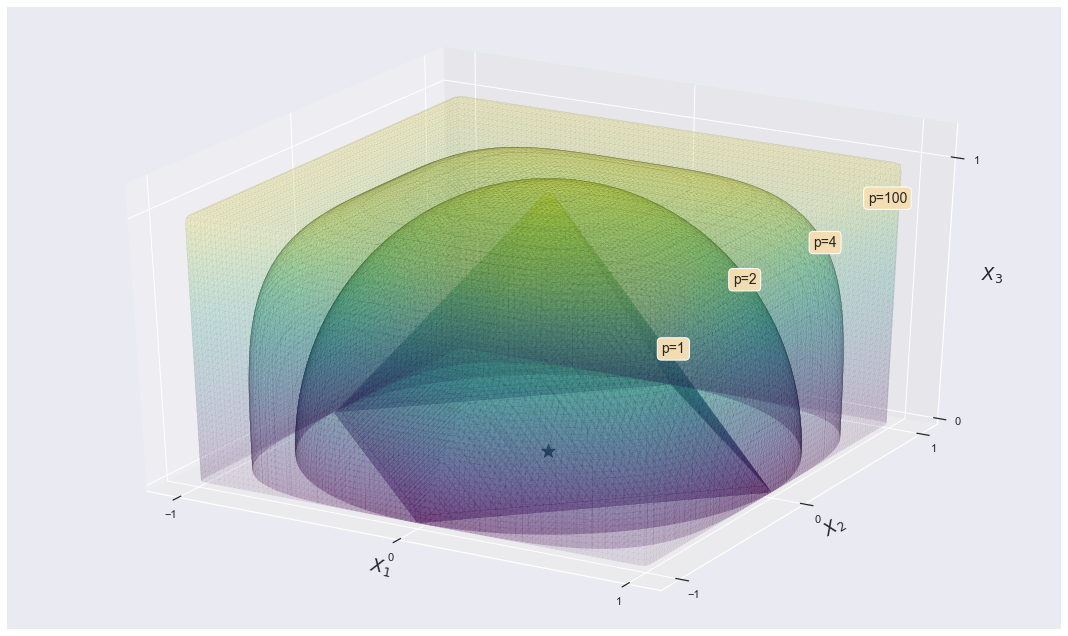

In [5]:
# Grid spacings
dx = ( x_max -  x_min)/( nbins-1)
dy = ( y_max -  y_min)/( nbins-1)
dz = ( z_max -  z_min)/( nbins2-1)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)

# Adjust transparency to see through the 4 surfaces
alpha = np.array([0.4, 0.3, 0.2, 0.1])

my_cmap = plt.get_cmap('viridis') 
fig = plt.figure(figsize =(15, 9))   
ax = plt.axes(projection ='3d') 
ax.scatter3D(0., 0., 0., c='k', marker='*', s=200);
    
for k in range(4):
    distance = np.squeeze(dist[:,:,:,k])
    distance = np.transpose(distance, (1, 0, 2))
    verts, faces, _, _ = marching_cubes_lewiner(distance, 1.0, spacing=( dy,  dx,  dz))
    ax.plot_trisurf(verts[:, 0]+y_min, verts[:,1]+x_min, faces, verts[:, 2]+z_min, alpha=alpha[k], 
                    edgecolor='k', linewidth=0.1, antialiased=True, zorder=1, cmap=my_cmap)


ax.set_xlim3d( x_min,  x_max)
ax.set_ylim3d( y_min,  y_max)
ax.set_zlim3d( z_min,  z_max)
ax.set_xlabel('$X_{1}$', rotation=0, fontsize=18)
ax.set_ylabel('$X_{2}$', fontsize=18)

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('$X_{3}$', rotation=0, fontsize=18)

# Assign a Minkowski dimension to each surface
ax.text(0.5, 0., 0.5, 'p=1', fontsize=14, verticalalignment='top', bbox=props, zorder=200)
ax.text(0.8, 0., 0.8, 'p=2', fontsize=14, verticalalignment='top', bbox=props, zorder=200)
ax.text(0.75, 0.75, 0.75, 'p=4', fontsize=14, verticalalignment='top', bbox=props, zorder=200)
ax.text(0.9, 0.9, 0.9, 'p=100', fontsize=14, verticalalignment='top', bbox=props, zorder=200)
    
ax.set_xticks(np.array([-1., 0., 1]))
ax.set_yticks(np.array([-1., 0., 1]))
ax.set_zticks(np.array([0., 1]))
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.1)    
fig.tight_layout()
    
plt.savefig('Minkowski distance_2.png')
plt.savefig('Minkowski distance_2.pdf')